# **Lab 4: Approximation**
**Anders Ågren Thuné**

# **Abstract**

This report describes how L2 projection was used to approximate functions in one and two
dimensions. In order to perform the projection, functions for numerical integration
using Gaussian quadrature were also implemented. The results show that the L2
projection clearly converges toward the approximated function in the domain as
the dimension of the approximation space $V_h$ grows.

# **About the code**

A short statement on who is the author of the file, and if the code is
distributed under a certain license.

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2019
# Anders Ågren Thuné (athune@kth.se)
# Johan Hoffman (jhoffman@kth.se)

# Code written by Anders Ågren Thuné based on the template by Johan Hoffman.

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need
additional modules, this is where you add them.

In [361]:
# Load neccessary modules.
import numpy as np
import numpy.linalg as la
import numpy.random as rd

from matplotlib import pyplot as plt
from matplotlib import tri

# **Introduction**

Function approximation is an important problem within a multitude of areas,
for instance solving of differential equations and machine learning.

L2-projection is one kind of function approximation, based on the concept of
orthogonal projections in a function space. Given a function $f \in L^2([a,b])$
to approximate, the L2-projection $P_Nf\in V_N \subseteq L^2([a,b])$ is defined
by $\displaystyle \int_a^bP_Nf(x)v(x)dx = \int_a^bf(x)v(x)dx, \quad \forall v \in V_N$,
corresponding to the orthogonal projection of $f$ onto the subspace $V_N$.

This gives $P_Nf(x) = \displaystyle \sum_{j=1}^N \alpha_j\phi_j(x)$, where
$\phi_j$ are basis functions of the subspace, and $\alpha_j$ are coefficents
which can be obtained through the equation $M\bar{\alpha}=b$, with
$M_{ij}=\displaystyle\int_a^b\phi_j(x)\phi_i(x)dx$, $b_i = \displaystyle
\int_a^b f(x)\phi_i(x)dx$.

In order to compute the integrals required, *quadrature rules* can be put to
use, where the approximation $\int_a^b f(x) dx \approx \displaystyle
\sum_{i=1}^nf(x_i)w_i$ is made. One such kind of quadrature rule is Gaussian
quadrature, where $x_i$ and $w_i$ are chosen to obtain exact results for
all polynomials of degree less than or equal to $2n-1$.

In this report, Gaussian quadrature and L2-projection is used as described in
chapters 9-12 in the notes to approximate functions in one and two dimensions.

# **Methods**

*One dimension*

In [526]:
def gq_1d(f, a, b):
    return f((a+b)/2)

In [527]:
def l2proj_1d(f, mesh):
    m = len(mesh)
    b = np.zeros(m)
    M = np.zeros((m,m))
    h = mesh[1:]-mesh[:-1]
    for i in range(m-1):
        b[i] += f(mesh[i])*h[i]/2
        b[i+1] += f(mesh[i+1])*h[i]/2

        M[i,i] += h[i]/3
        M[i,i+1] += h[i]/6
        M[i+1,i] += h[i]/6
        M[i+1,i+1] += h[i]/3

    return la.solve(M, b)

*Two dimensions*

In [528]:
def gq_2d(f, xs):
    M = np.array([[-xs[0,0]+xs[0,1], -xs[0,0]+xs[0,2]], [-xs[1,0]+xs[1,1], -xs[1,0]+xs[1,2]]])
    b = xs[:,0]
    return la.det(M)*f( M.dot([1/3,1/3]) + b )/2

In [529]:
def l2proj_2d(f, mesh):
    vertices = np.array([mesh.x, mesh.y])
    m = vertices.shape[1]
    b = np.zeros(m)
    M = np.zeros((m,m))
    for tr in mesh.triangles:
        for vert1 in range(3):
            b[tr[vert1]] += gq_2d(lambda x: f(x)/3, vertices[:,tr])
            for vert2 in range(3):
                M[tr[vert1],tr[vert2]] += gq_2d(lambda x: 1/9, vertices[:,tr])

    return la.solve(M,b)

# **Results**

The following section presents tests of the Gaussian quadrature functions,
as plots of the projected functions obtained, as well as plots of the convergence
of the projected functions to the actual functions as the dimension of $V_N$
grows.

In [506]:
nr_of_tests = 1000
value_range = 100000

In [507]:
for _ in range(nr_of_tests):
    a, b = rd.randn(2)*rd.randint(value_range, size=2)
    f = lambda x: a*x + b
    assert gq_1d(f,0.5) == a/2+b

print("Cleared tests!")

Cleared tests!


In [530]:
linmesh = np.linspace(0,2*np.pi,10)
projpoints = l2proj_1d(np.sin, linmesh)

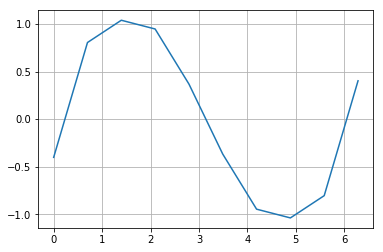

In [531]:
plt.plot(linmesh,projpoints)
plt.grid(True)

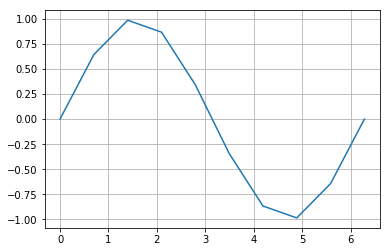

In [532]:
plt.plot(linmesh, np.sin(linmesh))
plt.grid(True)

*Convergence of 1d projections*

In [539]:
xv = range(5,45)
yv1 = np.zeros(len(xv))
yv2 = np.zeros(len(xv))
for idx, v in enumerate(xv):
    linmesh = np.linspace(1,6, v)
    projpoints1 = l2proj_1d(np.sin, linmesh)
    projpoints2 = l2proj_1d(np.exp, linmesh)
    yv1[idx] = la.norm(np.sin(linmesh)-projpoints1)
    yv2[idx] = la.norm(np.exp(linmesh)-projpoints2)

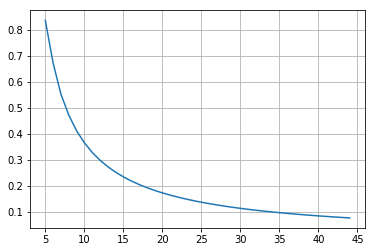

In [540]:
plt.plot(xv, yv1)
plt.grid(True)

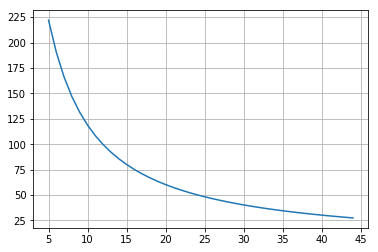

In [541]:
plt.plot(xv, yv2)
plt.grid(True)

In [394]:
for _ in range(nr_of_tests):
    a, b, c = rd.randn(3)*rd.randint(value_range, size=3)
    f = lambda x: a*x[0] + b*x[1] + c
    assert np.isclose(gq_2d(f,np.array([[0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])),
                      a/6+b/6+c/2)

print("Cleared tests!")

Cleared tests!


In [413]:
Nx = 15
Ny = 15
hx = 1.0/(Nx-1)
hy = 1.0/(Ny-1)
x = np.zeros((Nx*Ny))
y = np.zeros((Nx*Ny))
for i in range(Nx):
  for j in range(Ny):
      x[i*Nx + j] = j*hx
      y[i*Nx + j] = i*hy

mesh = tri.Triangulation(x, y)

vertices = np.array([mesh.x, mesh.y])
sol = l2proj_2d(lambda x: np.sin(x[0]*5)+np.cos(x[1]*5), mesh)

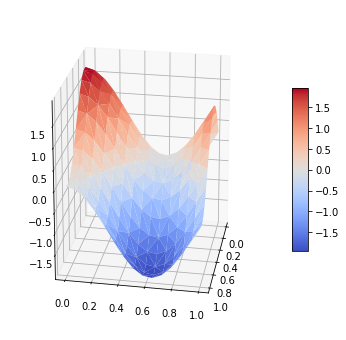

In [414]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(mesh,(lambda x: np.sin(x[0]*5)+np.cos(x[1]*5))(vertices), cmap=plt.cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.view_init(20,10)
plt.show()

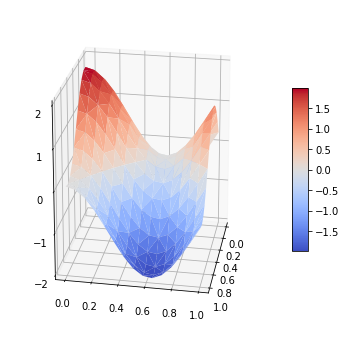

In [415]:
fig1 = plt.figure(figsize=(6,6))
ax1 = fig1.add_subplot(111, projection='3d')
surf1 = ax1.plot_trisurf(mesh, sol, cmap=plt.cm.coolwarm)
fig1.colorbar(surf1, shrink=0.5, aspect=10)
ax1.view_init(20,10)
plt.show()

In [284]:
la.norm((lambda x: np.sin(x[0]*5)+np.cos(x[1]*5))(vertices)-sol)

0.21261180763437032

In [402]:
xv = range(5,50)
yv1 = np.zeros(len(xv))
yv2 = np.zeros(len(xv))
for (idx,v) in enumerate(xv):
    Nx = v
    Ny = v
    hx = 1.0/(Nx-1)
    hy = 1.0/(Ny-1)
    x = np.zeros((Nx*Ny))
    y = np.zeros((Nx*Ny))
    for i in range(Nx):
        for j in range(Ny):
            x[i*Nx + j] = j*hx
            y[i*Nx + j] = i*hy

    mesh = tri.Triangulation(x, y)
    vertices = [mesh.x, mesh.y]
    sol1 = l2proj_2d(lambda x: np.sin(x[0]*5)+np.cos(x[1]*5), mesh)
    sol2 = l2proj_2d(lambda x: np.exp(x[0]+x[1])+x[0]*x[1], mesh)
    yv1[idx]=la.norm((lambda x: np.sin(x[0]*5)+np.cos(x[1]*5))(vertices)-sol1)
    yv2[idx]=la.norm((lambda x: np.exp(x[0]+x[1])+x[0]*x[1])(vertices)-sol2)

*Convergence of 2d projections*

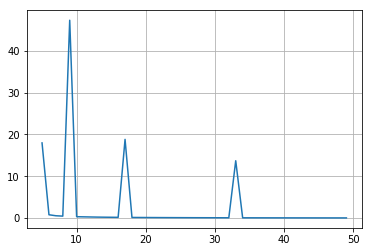

In [403]:
plt.plot(xv,yv1)
plt.grid(True)

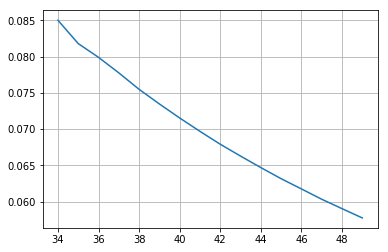

In [404]:
plt.plot(xv[29:],yv1[29:])
plt.grid(True)

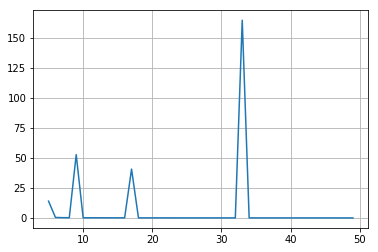

In [405]:
plt.plot(xv,yv2)
plt.grid(True)

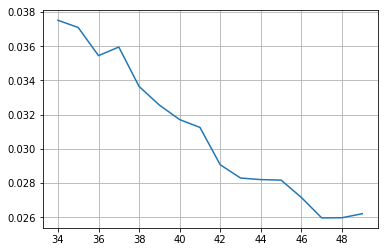

In [406]:
plt.plot(xv[29:],yv2[29:])
plt.grid(True)

# **Discussion**

The functions work as expected, but some strange spikes are apparent in the 2d-error.

# **References**

- The lecture notes.